In [120]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
data_path = "../data/with_stock_data.csv"
frame = pd.read_csv(data_path)
frame.columns

Index(['name', 'domain', 'year founded', 'industry', 'size range', 'city',
       ' state', 'country', ' linkedin url', 'current employee estimate',
       'total employee estimate', 'Score', 'reviews', 'salaries', 'interviews',
       'KMT', 'market_cap', 'enterprise_value', 'trailing_pe', 'forward_pe',
       'peg_ratio_5', 'price_sales', 'price_book', 'enterprise_value_revenue',
       'enterprise_value_ebitda', 'profit_margin', 'operating_margin',
       'return_on_assets', 'return_on_equity', 'revenue', 'revenue_per_share',
       'quarterly_revenue_share', 'gross_profit', 'ebitda',
       'net_income_avi_to_common', 'diluted_eps', 'quarterly_earnings_growth',
       'total_cash', 'total_cash_per_share', 'total_dept',
       'total_dept_per_equity', 'operating_cash_flow',
       'leveraged_free_cash_flow', 'stock_beta_3y', 'stock 52_week',
       'stock_sp500_52_week', 'stock_52_week_high', 'stock_52_week_low'],
      dtype='object')

# Data Exploration

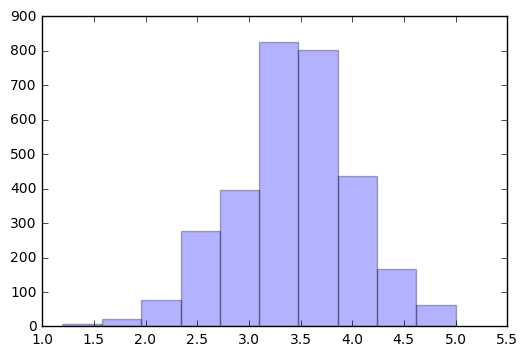

In [82]:
frame['Score']
plt.hist(frame['Score'], alpha=0.3)
plt.show()

# Feature Selection

In [83]:
# Pick Features
non_categorical_columns = ['year founded', 'current employee estimate', 'total employee estimate', 'reviews', 'salaries', 'interviews', 'market_cap', 'enterprise_value', 'trailing_pe', 'forward_pe', 'peg_ratio_5', 'price_sales', 'price_book', 'enterprise_value_revenue', 'enterprise_value_ebitda', 'profit_margin', 'operating_margin', 'return_on_assets', 'return_on_equity', 'revenue', 'revenue_per_share', 'quarterly_revenue_share', 'gross_profit', 'ebitda', 'net_income_avi_to_common', 'diluted_eps', 'quarterly_earnings_growth', 'total_cash', 'total_cash_per_share', 'total_dept', 'total_dept_per_equity', 'operating_cash_flow', 'leveraged_free_cash_flow', 'stock_beta_3y', 'stock 52_week', 'stock_sp500_52_week', 'stock_52_week_high', 'stock_52_week_low']
categorical_columns = ['industry', 'size range', 'city', ' state', 'country']

In [84]:
# Data Cleaning
le = LabelEncoder()
X = pd.DataFrame({key : frame[key] for key in categorical_columns + non_categorical_columns})
X[categorical_columns] = X[categorical_columns].apply(lambda col : le.fit_transform(col))

for x in non_categorical_columns:
    X[x] = X[x].fillna(X[x].mean())

indices = [X.columns.get_loc(c) for c in categorical_columns]
ohe = OneHotEncoder(categorical_features=indices, sparse=False)
X = ohe.fit_transform(X)
Y = pd.DataFrame({"y" : frame["Score"]})

# Linear Regression Random

In [63]:
# Normal CV with RANDOM data
X_random = pd.DataFrame({"rand" : np.random.random(Y.shape[0])})
x_train, x_test, y_train, y_test = train_test_split(X_random, Y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
error = mean_squared_error(y_test, predictions)
print("Mean Squared Error:")
print(error)

# Training data
# print("Training Accuracy")
# pred = model.predict(X)
# print(sum(np.abs(pred - Y.values) <  0.5)/ Y.shape[0])
# y_pred = convertToClass(pred, 10)
# Y_scaled = convertToClass(Y, 10)
# confusion_m = confusion_matrix(Y_scaled, y_pred)
# print(confusion_m)

Mean Squared Error:
0.3134541615457647


# Linear Regression

In [86]:
# Modeling
reg = LinearRegression().fit(X, Y)
pred = reg.predict(X)

In [104]:
def convertToClass(Y, k):
    return np.apply_along_axis(lambda elem : np.round(elem * k / 5), 0, Y)

In [88]:
# Training Data
print("Training Mean Square Error:")
print(mean_squared_error(Y, pred))
print("Training Accuracy")
print(sum(np.abs(pred - Y.values) <  0.5)/ Y.shape[0])
y_pred = convertToClass(pred, 10)
Y_scaled = convertToClass(Y, 10)
confusion_m = confusion_matrix(Y_scaled, y_pred)
print(confusion_m)

Training Mean Square Error:
0.18612736421221937
Training Accuracy
[0.7839948]
[[  1   0   0   0   1   0   0   0   0]
 [  0   3   1   1   3   0   0   0   0]
 [  0   0  21  10  22  14   0   0   0]
 [  0   0   6  95 103  95   5   0   0]
 [  0   0   0  34 382 345  26   0   0]
 [  0   0   0   6 185 755 105   0   0]
 [  0   0   0   1  50 300 260  14   0]
 [  0   0   0   0   6  82  59  42   2]
 [  0   0   0   0   1  14   9   1  14]]


In [109]:
# Test data: our own train / test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
error = mean_squared_error(y_test, predictions)
print("Test Mean Square Error")
print(error)
print("Test Accuracy")
print(sum(np.abs(predictions - y_test.values) <  0.5)/ y_test.shape[0])
print("Test Confusion Matrix")
y_pred = convertToClass(predictions, 10)
Y_scaled = convertToClass(y_test, 10)
print(len(y_pred))
print(len(Y_scaled))
confusion_m = confusion_matrix(Y_scaled, y_pred)
print(confusion_m)

Test Mean Square Error
2.621206180788179
Test Accuracy
[0.30569106]
Test Confusion Matrix
615
615
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  2  1  4  1  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  2  9 14 22 10  3  5  3  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  4 11 22 31 44 23  8  4  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  0  1  3  2  6 24 47 50 37 15  3  2  1  0  0  1  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  1  0  3  7 17 28 33 31 14  3  5  0  0  0  0  1  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  1  4 12 15  2  3  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 

In [96]:
# K Fold CV
model = LinearRegression()
scores = cross_val_score(model, X, Y, cv=5, scoring = "neg_mean_squared_error") # also use R^2
print("Test K Fold")
scores

Test K Fold


array([ -1.50736103, -31.68466428,  -0.62853002,  -1.49091231,
        -0.91144737])

# Softmax

In [114]:
# Data Cleaning
le = LabelEncoder()
X = pd.DataFrame({key : frame[key] for key in categorical_columns + non_categorical_columns})
X[categorical_columns] = X[categorical_columns].apply(lambda col : le.fit_transform(col))

for x in non_categorical_columns:
    X[x] = X[x].fillna(X[x].mean())

indices = [X.columns.get_loc(c) for c in categorical_columns]
ohe = OneHotEncoder(categorical_features=indices, sparse=False)
X = ohe.fit_transform(X)
Y = pd.DataFrame({"y" : frame["Score"]})

In [115]:
def convertToClass(Y, k):
    return Y.apply(lambda elem : np.round(elem * k / 5))

# def convertToScore(Y, k):
#     return Y.apply(lambda elem : elem * 5 / k)

In [116]:
k = 10
Y = convertToClass(Y, k)
Y["y"].value_counts()

7.0     1051
6.0      787
8.0      625
5.0      304
9.0      191
4.0       67
10.0      39
3.0        8
2.0        2
Name: y, dtype: int64

In [117]:
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs').fit(X, Y)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [118]:
# Training data
y_pred = clf.predict(X)
confusion_m = confusion_matrix(Y, y_pred)
training_accuracy = clf.score(X, Y)
print("Training Accuracy")
print(training_accuracy)
print(confusion_m)

Training Accuracy
0.33864671437865973
[[  0   0   0   0   0   2   0   0   0]
 [  0   0   0   0   0   8   0   0   0]
 [  0   0   0   0   2  56   9   0   0]
 [  0   0   0   0   5 262  37   0   0]
 [  2   0   0   0  11 687  87   0   0]
 [  0   1   0   0   6 912 131   1   0]
 [  0   0   0   0   8 499 118   0   0]
 [  0   0   0   0   2 156  33   0   0]
 [  1   0   0   0   1  33   4   0   0]]


In [112]:
# Test data: our own train / test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print("Test Mean Square Error")
error = mean_squared_error(y_test, predictions)
print(error)
print("Test Accuracy")
testing_accuracy = model.score(x_test, y_test)
print(testing_accuracy)
print("Test Confusion Matrix")
y_pred = convertToClass(predictions, 10)
Y_scaled = convertToClass(y_test, 10)
confusion_m = confusion_matrix(Y_scaled, y_pred)
print(confusion_m)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Mean Square Error
1.8048780487804879
Test Accuracy
0.3105691056910569
Test Confusion Matrix
[[  0   0   0   1   0   0   0   0]
 [  0   0   0   1  11   1   1   0]
 [  0   0   0   2  59   6   1   0]
 [  0   0   0   7 128  28   1   0]
 [  1   0   0   9 158  36   1   1]
 [  0   0   0   9  80  26   1   0]
 [  0   0   0   2  28   9   0   0]
 [  0   0   0   1   6   0   0   0]]


In [102]:
# Cross val score
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')
scores = cross_val_score(model, X, Y, cv=5, scoring = "neg_mean_squared_error") # also use R^2
print("Test K Fold Mean Squared Error")
scores

Test K Fold


array([  -7.81981659, -106.86816104,   -2.895721  ,   -3.37513062,
         -3.7710519 ])

# Support Vector Machine, Kernel = rbf

In [141]:
# Data Cleaning
le = LabelEncoder()
X = pd.DataFrame({key : frame[key] for key in categorical_columns + non_categorical_columns})
X[categorical_columns] = X[categorical_columns].apply(lambda col : le.fit_transform(col))

for x in non_categorical_columns:
    X[x] = X[x].fillna(X[x].mean())

indices = [X.columns.get_loc(c) for c in categorical_columns]
ohe = OneHotEncoder(categorical_features=indices, sparse=False)
X = ohe.fit_transform(X)
Y = pd.DataFrame({"y" : frame["Score"]})
k = 10
Y = convertToClass(Y, k)
Y["y"].value_counts()

7.0     1051
6.0      787
8.0      625
5.0      304
9.0      191
4.0       67
10.0      39
3.0        8
2.0        2
Name: y, dtype: int64

In [142]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
clf = SVC(gamma = 'auto', kernel='rbf', C=.8)
clf.fit(x_train, y_train)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [143]:
# Training data
y_pred = clf.predict(x_train)
confusion_m = confusion_matrix(y_train, y_pred)
training_accuracy = clf.score(x_train, y_train)
print(training_accuracy)
print(confusion_m)

0.8991459943066287
[[  0   0   0   0   0   2   0   0   0]
 [  0   0   0   0   0   8   0   0   0]
 [  0   0   0   0   0  56   0   0   0]
 [  0   0   0 239   0   1   0   0   0]
 [  0   0   0   0 632   0   0   0   0]
 [  0   0   0   0   0 855   0   0   0]
 [  0   0   0   0   0   3 485   0   0]
 [  0   0   0   0   0 148   0   0   0]
 [  0   0   0   0   0  30   0   0   0]]


In [144]:
# Testing data
y_pred = clf.predict(x_test)
confusion_m = confusion_matrix(y_test, y_pred)
test_accuracy = clf.score(x_test, y_test)
print(test_accuracy)
print(confusion_m)

0.31869918699186994
[[  0   0   0  11   0   0   0]
 [  0   0   0  64   0   0   0]
 [  0   0   0 155   0   0   0]
 [  0   0   0 196   0   0   0]
 [  0   0   0 137   0   0   0]
 [  0   0   0  43   0   0   0]
 [  0   0   0   9   0   0   0]]


# Support Vector Machine, Kernel = linear

In [145]:
# Data Cleaning
le = LabelEncoder()
X = pd.DataFrame({key : frame[key] for key in categorical_columns + non_categorical_columns})
X[categorical_columns] = X[categorical_columns].apply(lambda col : le.fit_transform(col))

for x in non_categorical_columns:
    X[x] = X[x].fillna(X[x].mean())

indices = [X.columns.get_loc(c) for c in categorical_columns]
ohe = OneHotEncoder(categorical_features=indices, sparse=False)
X = ohe.fit_transform(X)
Y = pd.DataFrame({"y" : frame["Score"]})
k = 10
Y = convertToClass(Y, k)
Y["y"].value_counts()

7.0     1051
6.0      787
8.0      625
5.0      304
9.0      191
4.0       67
10.0      39
3.0        8
2.0        2
Name: y, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
clf = SVC(gamma = 'auto', kernel='linear', C=1)
clf.fit(x_train, y_train)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Training data
y_pred = clf.predict(x_train)
confusion_m = confusion_matrix(y_train, y_pred)
training_accuracy = clf.score(x_train, y_train)
print(training_accuracy)
print(confusion_m)

In [ ]:
# Testing data
y_pred = clf.predict(x_test)
confusion_m = confusion_matrix(y_test, y_pred)
test_accuracy = clf.score(x_test, y_test)
print(test_accuracy)
print(confusion_m)

# Decision Trees

In [ ]:
# Data Cleaning
le = LabelEncoder()
X = pd.DataFrame({key : frame[key] for key in categorical_columns + non_categorical_columns})
X[categorical_columns] = X[categorical_columns].apply(lambda col : le.fit_transform(col))

for x in non_categorical_columns:
    X[x] = X[x].fillna(X[x].mean())

indices = [X.columns.get_loc(c) for c in categorical_columns]
ohe = OneHotEncoder(categorical_features=indices, sparse=False)
X = ohe.fit_transform(X)
Y = pd.DataFrame({"y" : frame["Score"]})
k = 10
Y = convertToClass(Y, k)
Y["y"].value_counts()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)